# Ollama Test 
## Categorize Expense Data

https://github.com/thu-vu92/local-llms-analyse-finance/blob/main/categorize_expenses.ipynb

### Test the LLM

In [1]:
#!pip3 install langchain_community

In [1]:
from langchain_community.llms import Ollama

In [2]:
llm = Ollama(model="openchat:7b")
llm.invoke("what country is the krabi province in?")

' The Krabi Province is located in Thailand.'

### Import Data

In [4]:
# Read the transactions_2022_2023.csv file 
import pandas as pd
df = pd.read_csv("transactions_2022_2023.csv")
df.head()

/var/folders/sy/4k3fghsx7sx6thd5dw0l7l4m0000gn/T/ipykernel_64979/3553452196.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Date,Name / Description,Expense/Income,Amount (EUR)
0,2023-12-30,Belastingdienst,Expense,9.96
1,2023-12-30,Tesco Breda,Expense,17.53
2,2023-12-30,Monthly Appartment Rent,Expense,451.00
3,2023-12-30,Vishandel Sier Amsterdam,Expense,12.46
4,2023-12-29,Selling Paintings,Income,13.63


In [5]:
# Get unique transactions in the Name / Description column
unique_transactions = df["Name / Description"].unique()
len(unique_transactions)

23

In [6]:
unique_transactions[1:10]

array(['Tesco Breda', 'Monthly Appartment Rent',
       'Vishandel Sier Amsterdam', 'Selling Paintings',
       'Spotify Ab By Adyen', 'Tk Maxx Amsterdam Da', 'Consulting',
       'Aidsfonds', 'Tls Bv Inz Ov-Chipkaart'], dtype=object)

### Categorize Transection with LLM

In [7]:
# Get index list
#https://stackoverflow.com/questions/47518609/for-loop-range-and-interval-how-to-include-last-step
def hop(start, stop, step):
    for i in range(start, stop, step):
        yield i
    yield stop

index_list = list(hop(0, len(unique_transactions), 10))
index_list

[0, 10, 20, 23]

In [8]:
def categorize_transactions(transaction_names, llm):
    response = llm.invoke("Can you add an appropriate category to the following expenses. For example: Spotify AB by Adyen - Entertainment, Beta Boulders Ams Amsterdam Nld - Sport, etc.. Categories should be less than 4 words. " + transaction_names)
    response = response.split('\n')

    print(response)

    # Put in dataframe
    categories_df = pd.DataFrame({'Transaction vs category': response})
    categories_df[['Transaction', 'Category']] = categories_df['Transaction vs category'].str.split(' - ', expand=True)
    
    return categories_df

In [11]:
# Test out the function
categorize_transactions('ISS Catering Services De Meern, Taxi Utrecht, Etos AMSTERDAM NLD, Bistro Bar Amsterdam',
                        llm)

[' Sure, here are the categories for the given expenses:', '', '1. Spotify AB by Adyen - Entertainment', '2. Beta Boulders Ams Amsterdam Nld - Sport', '3. ISS Catering Services De Meern - Food', '4. Taxi Utrecht - Transportation', '5. Etos AMSTERDAM NLD - Shopping', '6. Bistro Bar Amsterdam - Dining']


,Transaction vs category,Transaction,Category
0,"Sure, here are the categories for the given e...","Sure, here are the categories for the given e...",None
1,,,None
2,1. Spotify AB by Adyen - Entertainment,1. Spotify AB by Adyen,Entertainment
3,2. Beta Boulders Ams Amsterdam Nld - Sport,2. Beta Boulders Ams Amsterdam Nld,Sport
4,3. ISS Catering Services De Meern - Food,3. ISS Catering Services De Meern,Food
5,4. Taxi Utrecht - Transportation,4. Taxi Utrecht,Transportation
6,5. Etos AMSTERDAM NLD - Shopping,5. Etos AMSTERDAM NLD,Shopping
7,6. Bistro Bar Amsterdam - Dining,6. Bistro Bar Amsterdam,Dining


In [12]:
# Intialise the categories_df_all dataframe
categories_df_all = pd.DataFrame()

# Loop through the index_list
for i in range(0, len(index_list)-1):
    transaction_names = unique_transactions[index_list[i]:index_list[i+1]]
    transaction_names = ','.join(transaction_names)

    categories_df = categorize_transactions(transaction_names, llm)
    categories_df_all = pd.concat([categories_df_all, categories_df], ignore_index=True)

[' Belastingdienst - Taxes', 'Tesco Breda - Groceries', 'Monthly Apartment Rent - Housing', 'Vishandel Sier Amsterdam - Seafood', 'Selling Paintings - Art Sales', 'Spotify Ab By Adyen - Music Subscription', 'Tk Maxx Amsterdam Da - Clothing', 'Consulting - Services', 'Aidsfonds - Donations', 'Tls Bv Inz Ov-Chipkaart - Public Transport']
[' Sure, here are the categories for the given expenses:', '', '1. Spotify AB by Adyen - Entertainment', '2. Beta Boulders Ams Amsterdam Nld - Sport', '3. Salary - Income', '4. Bouldermuur Bv Amsterdam - Sport', '5. Birtat Restaurant Amsterdam - Dining', '6. Freelancing - Income', '7. Tikkie - Banking', '8. Blogging - Hobby/Income', '9. Taxi Utrecht - Transportation', '10. Apple Services - Technology']
[' Spotify AB by Adyen - Entertainment', 'Beta Boulders Ams Amsterdam Nld - Sport', 'Amazon Lux - Shopping', 'ClassPass* Monthly - Fitness', 'Audible UK AdblCo/Pymt Gbr - Books & Media']


In [ ]:
categories_df_all

,Transaction vs category,Transaction,Category
0,Belastingdienst - Taxes,Belastingdienst,Taxes
1,Tesco Breda - Groceries,Tesco Breda,Groceries
2,Monthly Apartment Rent - Housing,Monthly Apartment Rent,Housing
3,Vishandel Sier Amsterdam - Fish Market,Vishandel Sier Amsterdam,Fish Market
4,Selling Paintings - Art Sales,Selling Paintings,Art Sales
5,Spotify Ab By Adyen - Entertainment Subscription,Spotify Ab By Adyen,Entertainment Subscription
6,Tk Maxx Amsterdam Da - Retail Shopping,Tk Maxx Amsterdam Da,Retail Shopping
7,Consulting - Services,Consulting,Services
8,Aidsfonds - Nonprofit,Aidsfonds,Nonprofit
9,Tls Bv Inz Ov-Chipkaart - Transportation,Tls Bv Inz Ov-Chipkaart,Transportation


In [13]:
# Get unique categories in categories_df_all
unique_categories = categories_df_all["Category"].unique()
unique_categories

array(['Taxes', 'Groceries', 'Housing', 'Seafood', 'Art Sales',
       'Music Subscription', 'Clothing', 'Services', 'Donations',
       'Public Transport', None, 'Entertainment', 'Sport', 'Income',
       'Dining', 'Banking', 'Hobby/Income', 'Transportation',
       'Technology', 'Shopping', 'Fitness', 'Books & Media'], dtype=object)

In [14]:
# Drop NA values
categories_df_all = categories_df_all.dropna()

In [15]:
categories_df_all

,Transaction vs category,Transaction,Category
0,Belastingdienst - Taxes,Belastingdienst,Taxes
1,Tesco Breda - Groceries,Tesco Breda,Groceries
2,Monthly Apartment Rent - Housing,Monthly Apartment Rent,Housing
3,Vishandel Sier Amsterdam - Seafood,Vishandel Sier Amsterdam,Seafood
4,Selling Paintings - Art Sales,Selling Paintings,Art Sales
5,Spotify Ab By Adyen - Music Subscription,Spotify Ab By Adyen,Music Subscription
6,Tk Maxx Amsterdam Da - Clothing,Tk Maxx Amsterdam Da,Clothing
7,Consulting - Services,Consulting,Services
8,Aidsfonds - Donations,Aidsfonds,Donations
9,Tls Bv Inz Ov-Chipkaart - Public Transport,Tls Bv Inz Ov-Chipkaart,Public Transport


In [16]:
# Remove the numbering eg "1. " from Transaction column
categories_df_all['Transaction'] = categories_df_all['Transaction'].str.replace(r'\d+\.\s+', '', regex=True)
categories_df_all

,Transaction vs category,Transaction,Category
0,Belastingdienst - Taxes,Belastingdienst,Taxes
1,Tesco Breda - Groceries,Tesco Breda,Groceries
2,Monthly Apartment Rent - Housing,Monthly Apartment Rent,Housing
3,Vishandel Sier Amsterdam - Seafood,Vishandel Sier Amsterdam,Seafood
4,Selling Paintings - Art Sales,Selling Paintings,Art Sales
5,Spotify Ab By Adyen - Music Subscription,Spotify Ab By Adyen,Music Subscription
6,Tk Maxx Amsterdam Da - Clothing,Tk Maxx Amsterdam Da,Clothing
7,Consulting - Services,Consulting,Services
8,Aidsfonds - Donations,Aidsfonds,Donations
9,Tls Bv Inz Ov-Chipkaart - Public Transport,Tls Bv Inz Ov-Chipkaart,Public Transport


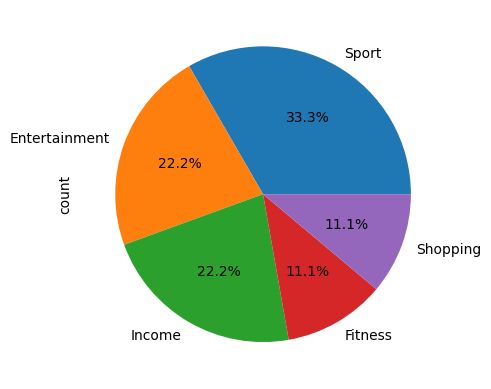

In [17]:
# Plot the top 5 categories in pie chart of the categories_df_all dataframe
categories_df_all['Category'].value_counts().head(5).plot.pie(autopct='%1.1f%%')

import matplotlib.pyplot as plt

